In [12]:
import numpy as np
from math import *
import scipy
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

In [4]:
def my_func(x):
    #if( (x > 30.0) or (x < 1.0))
    #    raise Exception(" function not defined for such x value")
    return sin(x / 5.0) * exp(x / 10.0) + 5.0 * exp(-x / 2.0)
print my_func(1.0)

3.25221686527


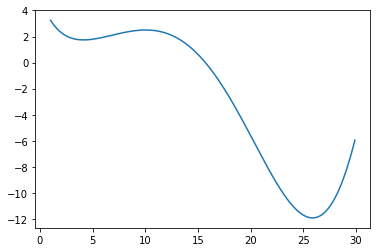

In [10]:
# func plot :
x_points = np.arange(1.0, 30.0, 0.1)
y_points = [my_func(t) for t in x_points]

plt.plot( x_points, y_points)
plt.show()
# mimimum x ~ 25.5

In [29]:
# try to find func mimimum with default params:
# x0 start point 
x0 = 13.8;
res = minimize(my_func, x0)
print res
print(res.x)
print type(res.x[0])

      fun: -11.89889466592772
 hess_inv: array([[ 1.62315795]])
      jac: array([ -8.10623169e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([ 25.88017961])
[ 25.88017961]
<type 'numpy.float64'>


In [39]:
# for x = 14 and more and some other mimimum is found
# for x < 10.5  we stuck in local minimum
# for some x ( x = 13, x = 15.5 )  algotithm failed

x0_array = np.arange(1.0, 30.0, 0.5)
for i in x0_array:
    res_tmp = minimize(my_func, i )
    x_min  =  res_tmp.x[0]
    #print ('x0=' , 'x_min' =  x_min )  
    print (i, x_min )

(1.0, 4.1362869747537907)
(1.5, 4.1362885393735489)
(2.0, 4.1362762817728367)
(2.5, 4.1362874417752638)
(3.0, 4.1362332279076881)
(3.5, 4.1362750722709629)
(4.0, 4.1362573466833856)
(4.5, 4.1362937949764849)
(5.0, 4.1362883226664824)
(5.5, 4.1362886402796173)
(6.0, 4.1362898219299806)
(6.5, 4.1362842437435932)
(7.0, 4.136289460911911)
(7.5, 4.1362885458218805)
(8.0, 4.1362888290037816)
(8.5, 4.136284950770639)
(9.0, 4.1363021838576444)
(9.5, 4.1363176782212907)
(10.0, 4.1363002278699295)
(10.5, 25.880193065920338)
(11.0, 25.880192848524555)
(11.5, 25.880193997459862)
(12.0, 25.880191723025987)
(12.5, 25.880192984402168)
(13.0, 88.712036048734845)
(13.5, 25.880192684076434)
(14.0, 25.8801931534719)
(14.5, 25.880193224000593)
(15.0, 24.677661090968858)
(15.5, 151.54388901607985)
(16.0, 25.880198765448892)
(16.5, 25.880193011542836)
(17.0, 25.880176634428082)
(17.5, 25.880194891062239)
(18.0, 25.880198508017731)
(18.5, 25.880198912107712)
(19.0, 25.88017637085996)
(19.5, 25.88019269776794

In [42]:
# try BFGS method ; x0 = 2
x0 = 2
BFGS_min =  minimize(my_func, x0, method= 'BFGS')
print BFGS_min 
print
print BFGS_min.x
print BFGS_min.fun

      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])

[ 4.13627628]
1.74526829034


In [43]:
# first answer function value: 
ans_1 = round( BFGS_min.fun,2)
print ans_1

1.75


In [46]:
x0 = 30
BFGS_min =  minimize(my_func, x0, method= 'BFGS')
ans_2 = round( BFGS_min.fun,2)
print round(ans_2,2 )

-11.9


# global optimization

In [54]:
# use differential evolution 
bounds= [ (1, 30) ] 
result = scipy.optimize.differential_evolution(bounds= bounds, func= my_func)
print result
ans_3 = round(result.fun,2)
print ans_3

     fun: -11.898894665980682
     jac: array([  8.88178420e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([ 25.8801945])
-11.9


#  not smooth function minimization



In [55]:
def my_func_int(x):
    return  round( my_func(x),0)

print my_func_int(1.5)
print my_func(1.5)

3.0
2.70517825922


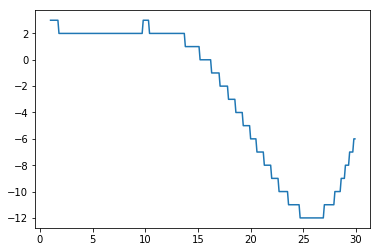

In [56]:
# integer func plot :
x_points = np.arange(1.0, 30.0, 0.1)
y_points = [my_func_int(t) for t in x_points]

plt.plot( x_points, y_points)
plt.show()
# function is not smooth

In [62]:
x0 = 30
BFGS_min =  minimize(my_func_int, x0= x0, method= 'BFGS')
print BFGS_min
print BFGS_min.x
ans_4 = round( BFGS_min.fun, 2)
print ans_4

      fun: -6.0
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])
[ 30.]
-6.0


In [63]:
bounds= [ (1, 30) ] 
result = scipy.optimize.differential_evolution(bounds= bounds, func= my_func_int)
print result
print result.x
ans_5 = round(result.fun, 2)
print ans_5

     fun: -12.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 26.79351421])
[ 26.79351421]
-12.0


In [ ]:
# print all answers together
# 3 files:
